## Graficos que pueden ser útiles

In [2]:
# importacion general de librerias y de visualizacion (matplotlib y seaborn)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random as rd
%matplotlib inline

plt.style.use('default') # haciendo los graficos un poco mas bonitos en matplotlib
#plt.rcParams['figure.figsize'] = (20, 10)

sns.set(style="whitegrid") # seteando tipo de grid en seaborn

pd.options.display.float_format = '{:20,.2f}'.format # suprimimos la notacion cientifica en los outputs

#import warnings
#warnings.filterwarnings('ignore')

In [3]:
edificios = pd.read_csv('datos/train_values.csv',nrows=0)
columnas = edificios.columns.to_list()
datatypes = {
    **{columnas[0]:np.int32}\
    , **{column:np.int16 for column in columnas[1:8] + columnas[27:28]}\
    , **{column:'category' for column in columnas[8:15] + columnas[26:27]}\
    , **{column:np.bool for column in columnas[15:26] + columnas[28:39]}
}
edificios = pd.read_csv('datos/train_values.csv',dtype=datatypes,usecols=None)
edificios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260601 entries, 0 to 260600
Data columns (total 39 columns):
 #   Column                                  Non-Null Count   Dtype   
---  ------                                  --------------   -----   
 0   building_id                             260601 non-null  int32   
 1   geo_level_1_id                          260601 non-null  int16   
 2   geo_level_2_id                          260601 non-null  int16   
 3   geo_level_3_id                          260601 non-null  int16   
 4   count_floors_pre_eq                     260601 non-null  int16   
 5   age                                     260601 non-null  int16   
 6   area_percentage                         260601 non-null  int16   
 7   height_percentage                       260601 non-null  int16   
 8   land_surface_condition                  260601 non-null  category
 9   foundation_type                         260601 non-null  category
 10  roof_type                       

In [4]:
daños = pd.read_csv('datos/train_labels.csv',dtype={'building_id':np.int32,'damage_grade':np.int8})

# Una matriz de correlacion

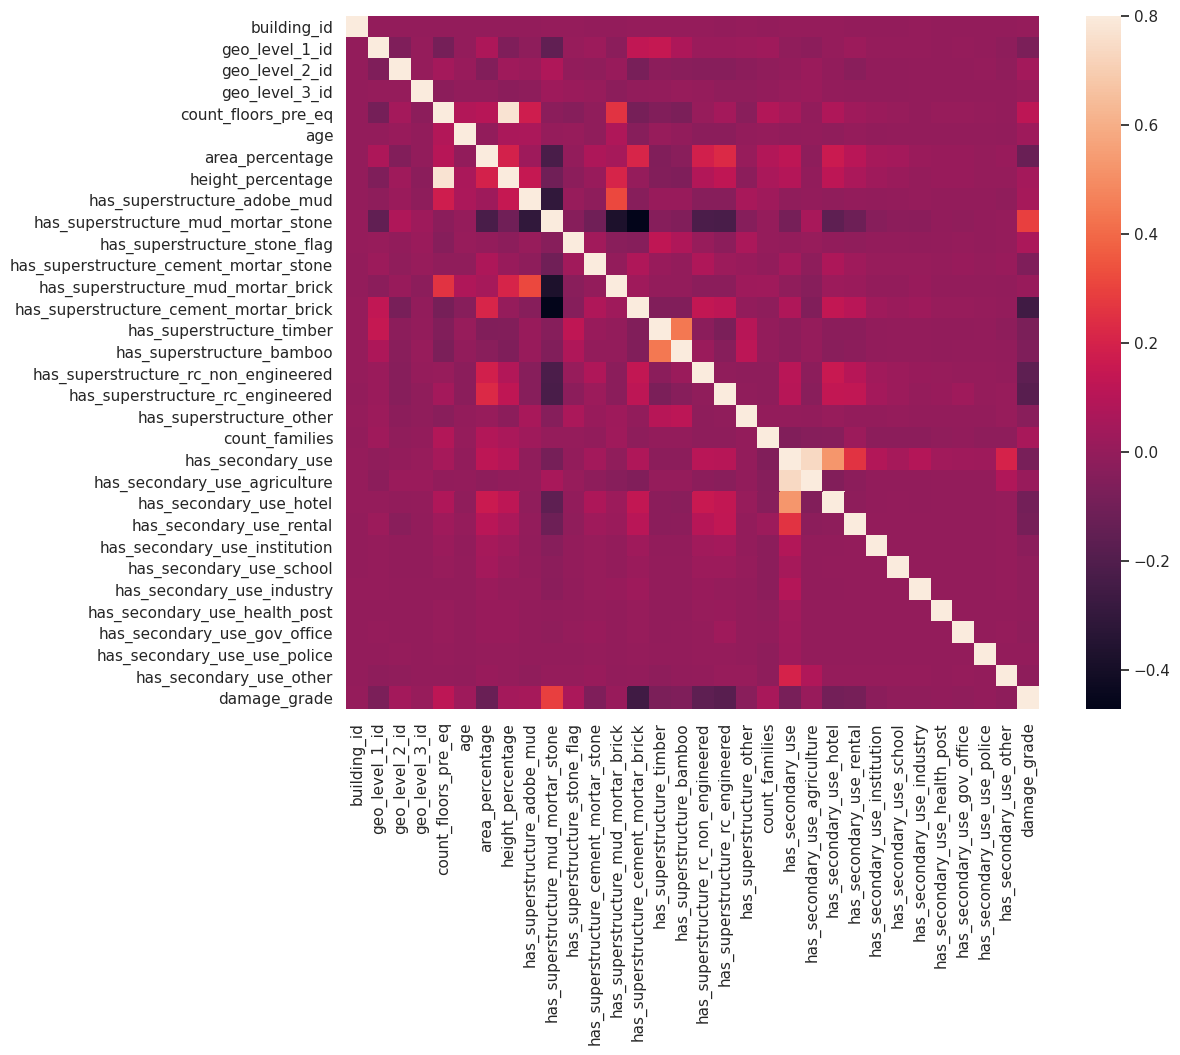

In [5]:
joined = pd.merge(edificios,daños,on='building_id',how='inner')
corrmat = joined.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

# Graficos de lugar geografico vs familias

In [6]:
edificios_geo_big = edificios[['geo_level_1_id','building_id']]\
                    .groupby('geo_level_1_id').count().rename(columns={'building_id':'buildings'}).reset_index()
edificios_geo_big.head(5)

,geo_level_1_id,buildings
0,0,4011
1,1,2701
2,2,931
3,3,7540
4,4,14568


In [7]:
familias_geo_big = edificios.loc[:,['geo_level_1_id','count_families']].groupby('geo_level_1_id').agg(sum).reset_index()
familias_geo_big.head(5)

,geo_level_1_id,count_families
0,0,3950
1,1,2703
2,2,894
3,3,7936
4,4,13726


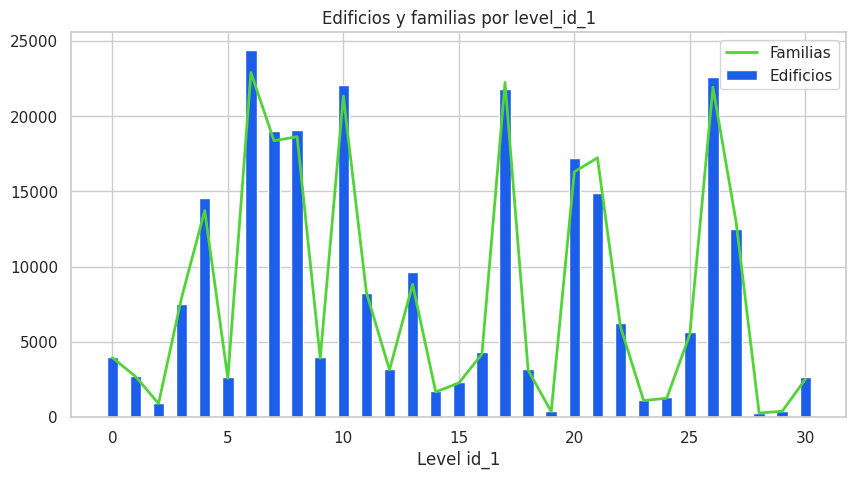

In [8]:
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(edificios_geo_big['geo_level_1_id'],edificios_geo_big['buildings'], color ='#1c5eea',
        width = 0.5,label='Edificios')

plt.plot(familias_geo_big['geo_level_1_id'],familias_geo_big['count_families'],linewidth=2, color ='#52d338',label='Familias')
plt.xlabel("Level id_1")
plt.title("Edificios y familias por level_id_1")
ax = plt.gca()
ax.legend()
plt.show()

## AGE vs Categoricos
Pongo 2 ejemplos que se ve "claro" algo, en la celda de abajo hay mas descripcion del analisis entre la columna age vs la columna categorica

In [9]:
#  8   land_surface_condition                  260601 non-null  category -> no interesante
#  9   foundation_type                         260601 non-null  category -> no interesante
#  10  roof_type                               260601 non-null  category -> las casas mas nuevas usan roof_type x
#  11  ground_floor_type                       260601 non-null  category -> las casas mas nuevas usan ground_floor_type v
#  12  other_floor_type                        260601 non-null  category -> no interesante
#  13  position                                260601 non-null  category -> las casas mas viejas se orientan en la posicion o
#  14  plan_configuration                      260601 non-null  category -> las casas con formato sismico 'm' suelen ser mas viejas
edificios_low100 = edificios.loc[edificios['age']<=100,:]

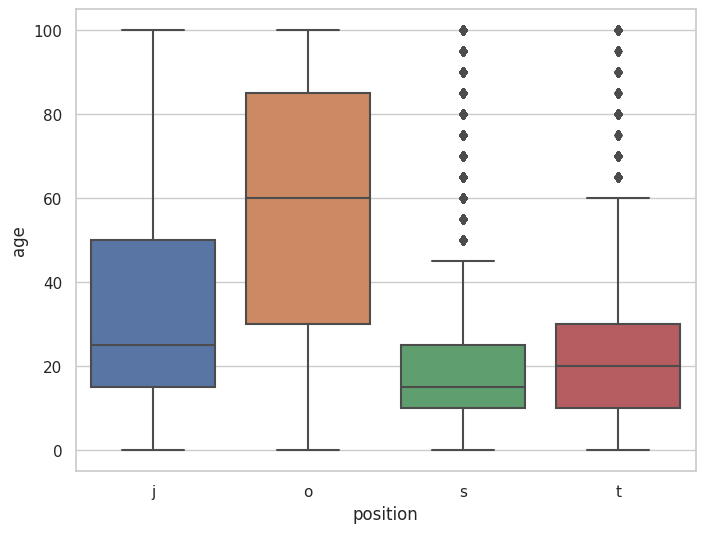

In [10]:
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='position', y="age", data=edificios_low100)


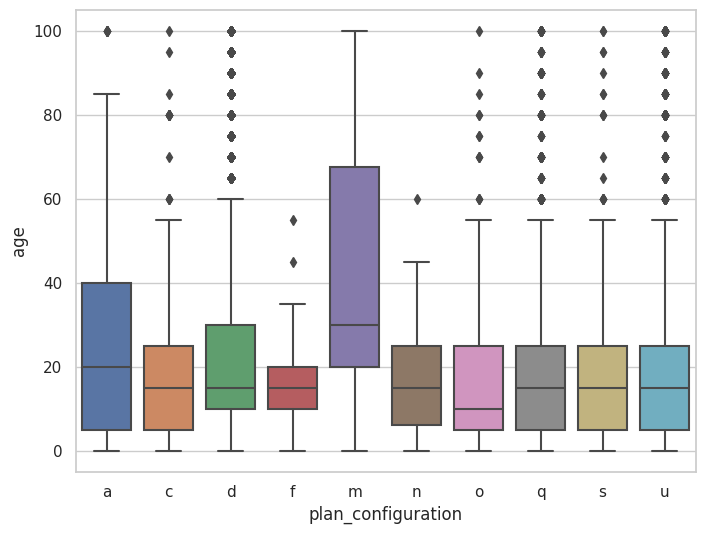

In [11]:
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='plan_configuration', y="age", data=edificios_low100)


# Uso secundario y daños

In [17]:
secondary_use = edificios.loc[:,['building_id']+columnas[29:39]] # building_id + secondary_use
damage_sec_use = pd.merge(secondary_use,daños,on='building_id',how='inner')
damage_sec_use = damage_sec_use.iloc[:,1:]
damage_sec_use = damage_sec_use.groupby('damage_grade').agg(sum).reset_index()
damage_sec_use = damage_sec_use.iloc[:,1:]
damage_sec_use

,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,829,2216,877,99,30,59,12,13,4,175
1,10679,5058,1051,129,47,152,32,21,12,852
2,5269,1489,183,17,17,68,5,4,7,307


In [18]:
damage_sec_use_perc = damage_sec_use.transpose()
damage_sec_use_perc = damage_sec_use_perc.div(damage_sec_use_perc.sum(axis=1), axis=0)
damage_sec_use_perc = damage_sec_use_perc.transpose()
damage_sec_use_perc

,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,0.05,0.25,0.42,0.40,0.32,0.21,0.24,0.34,0.17,0.13
1,0.64,0.58,0.50,0.53,0.50,0.54,0.65,0.55,0.52,0.64
2,0.31,0.17,0.09,0.07,0.18,0.24,0.10,0.11,0.30,0.23


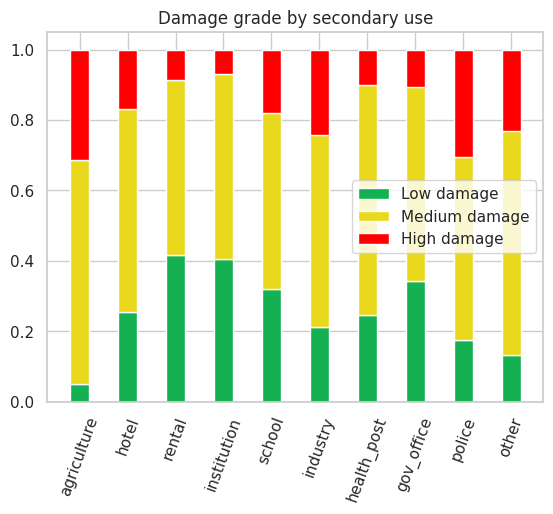

In [19]:
labels = columnas[29:39]
labels = [sec_use.split("use_")[-1] for sec_use in labels]

low_affected,medium_affected,high_affected = np.array(damage_sec_use_perc.values.tolist())

width = 0.4
fig, ax = plt.subplots()

ax.bar(labels, low_affected, width, label='Low damage',color='#13b151')
ax.bar(labels, medium_affected, width, bottom=low_affected,label='Medium damage', color='#ead81c')
ax.bar(labels, high_affected, width, bottom=low_affected+medium_affected,label='High damage', color='red')

ax.set_title('Damage grade by secondary use')
ax.legend()
plt.xticks(rotation=70)
plt.show()